In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [118]:
pred_df = pd.read_pickle('./output_file/20230322_multi_factor_v2.0.3_testing.pickle')
seq_len = 128

In [38]:
# df = pred_df[seq_len:]
# df['next_pred_Close'] = df['pred_Close'].shift(1)
# df['next_atcual_Close'] = df['Close'].shift(1)
# df[['Close','pred_Close','next_pred_Close']]

,Close,pred_Close,next_pred_Close
128,16645.2,16584.015714,NaN
129,16659.2,16595.301464,16584.015714
130,16689.7,16568.848853,16595.301464
131,16657.0,16633.149597,16568.848853
132,16657.7,16659.083569,16633.149597
...,...,...,...
3074,27952.2,27873.722283,27406.349972
3075,28026.1,27938.858895,27873.722283
3076,28167.7,28045.972119,27938.858895
3077,28019.1,28207.407079,28045.972119


In [4]:
# def buy_plan(predicted_test, close_col='Close',pred_col='pred_Close',input_money=100, lever=1, handle_fee = 0.0005, trade_percent_cutoff=0.0, print_history=False, seq_len=128):
#     ############### args ##########
#     # input = predictied dataframe with 'close_original' and 'pred_close' columns
#     # input_money = trading money
#     # lever = 槓桿
#     # handle_fee = trading fee
#     # trade_percent_cutoff = if expected income is lower that cutoff, skip this trade
#     # print_history = print out each trading detail
#     ############## output ##########
#     # df = with 'total_earn_money', 'day_earn_percent', 'total_day_earn_percent' columns
#     # win_rate = trading win percent
#     ###############################
    
#     # input 128 datas

#     input_df = predicted_test[seq_len:].reset_index(drop=True).copy()
#     total_earn_money = [input_money]
#     total_day_earn_percent = [0]
#     trading_list = []
#     day = []
#     win_count = 0
#     trade = ''
#     for i in range(len(input_df)-1):
#         earn_persent          = (input_df[close_col][i+1] - input_df[close_col][i])/input_df[close_col][i]
#         expected_earn_percent = (input_df[pred_col][i+1] - input_df[close_col][i])    /input_df[close_col][i]
#         charge_handle_fee     = handle_fee*input_money*lever
#         trading_winlost       = np.sign(earn_persent) * np.sign(expected_earn_percent)
#         trading_strategy      = 'Long' if expected_earn_percent > 0 else 'Short' 
#         if abs(expected_earn_percent*100) < trade_percent_cutoff:
#             total_earn_money.append(input_money)
#             continue
#         day_earn_percent = (abs(earn_persent)*lever*trading_winlost) + 1
#         earn_money = input_money*day_earn_percent
#         if trade != trading_strategy:
#             earn_money -= charge_handle_fee
#             trade = trading_strategy
            
#         if print_history == True:
#             print(f'Trading {i+1}')
#             print(f'Trade_{trade}----:', f'{(earn_persent*lever)*100}%')
#             print('handle_fee---:', charge_handle_fee)
#             print('input_money--:',input_money)
#             print('output_money-:',earn_money)
#             print('--------------------------')
#         total_earn_money.append(earn_money)
#         trading_list.append(trading_strategy)
#         #total_day_earn_percent.append((1-day_earn_percent)*100)
#         day.append(i)
#         if day_earn_percent > 1:
#             win_count += 1
#         input_money = earn_money
#         if earn_money < 0:
#             print('You Are broken XD')
#             return input_df
#     input_df['trading'][1:] = trading_list
#     input_df['total_earn_money']       = total_earn_money
#     input_df['day_earn_percent']       = (input_df['total_earn_money'].shift(0) - input_df['total_earn_money'].shift(1))/input_df['total_earn_money'].shift(0)*100
#     input_df['total_day_earn_percent'] = input_df['total_earn_money'].apply(lambda x: (x- total_earn_money[0])/total_earn_money[0]*100)
#     win_rate = (win_count/len(day))
#     input_df = input_df.fillna('-')
#     print('trading win rate:', win_rate)
#     return input_df

In [5]:
# input_df= buy_plan(pred_df, input_money=10000, lever=2, trade_percent_cutoff=0.0, print_history=True)

Trading 1
Trade_Short----: 0.16821666306202387%
handle_fee---: 10.0
input_money--: 10000
output_money-: 9973.178333693797
--------------------------
Trading 2
Trade_Short----: 0.3661640414905878%
handle_fee---: 9.973178333693797
input_money--: 9973.178333693797
output_money-: 9936.66014084208
--------------------------
Trading 3
Trade_Short----: -0.39185845161987004%
handle_fee---: 9.93666014084208
input_money--: 9936.66014084208
output_money-: 9975.597783412712
--------------------------
Trading 4
Trade_Long----: 0.008404874827408627%
handle_fee---: 9.975597783412711
input_money--: 9975.597783412712
output_money-: 9966.460622136281
--------------------------
Trading 5
Trade_Long----: -0.48386031685045683%
handle_fee---: 9.966460622136282
input_money--: 9966.460622136281
output_money-: 9918.236874191236
--------------------------
Trading 6
Trade_Long----: 0.057770770397285634%
handle_fee---: 9.918236874191237
input_money--: 9918.236874191236
output_money-: 9923.966716043284
-----------

KeyError: 'trading'

In [126]:
# shiftting issue needs to be fix
def backtesting(input_df, input_money=100, lever=1, handle_fee_percent = 0.0025, trade_percent_cutoff=0.05, print_history=False, seq_len=128):
    
    df = input_df[seq_len:]
    df['next_pred_Close'] = df['pred_Close'].shift(1)
    df['next_atcual_Close'] = df['Close'].shift(1)
    df['Close_ptc'] = df['Close'].pct_change().abs()
    df = df.dropna()
    df['next_pred_buy'] = df.apply(lambda x: 1 if x.Close < x.next_pred_Close else -1, axis=1)
    df['next_actual_buy'] = df.apply(lambda x: 1 if x.Close < x.next_atcual_Close else -1, axis=1)
    df['trade_result'] = df.apply(lambda x: x.next_pred_buy*x.next_actual_buy, axis=1)
    df['single_income'] = '-'
    df['total_input_money'] = '-'
    for idx in df.index:
        if input_money <= 0:
            input_money = 0
            df['total_input_money'][idx] = 0
            continue
        else:
            df['single_income'][idx] = (df['trade_result'][idx]*df['Close_ptc'][idx]*input_money*lever) - (input_money*lever*handle_fee_percent/100)
            input_money = input_money + df['single_income'][idx]
            if input_money <= 0:
                input_money = 0
                df['total_input_money'][idx] = 0
                continue
            else:
                df['total_input_money'][idx] = input_money
    return df.round(3)

In [134]:
back_df = backtesting(pred_df, input_money=10000, lever=10, handle_fee_percent = 0.1, trade_percent_cutoff=0.0, print_history=False, seq_len=128)

/tmp/ipykernel_2833/1378765233.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['single_income'][idx] = (df['trade_result'][idx]*df['Close_ptc'][idx]*input_money*lever) - (input_money*lever*handle_fee_percent/100)
/tmp/ipykernel_2833/1378765233.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_input_money'][idx] = input_money


In [128]:
back_df[(back_df['trade_result']== 1)].shape[0] /back_df.shape[0]

0.6389830508474577

In [140]:
back_df['total_input_money'].min()

1185.7325883401586

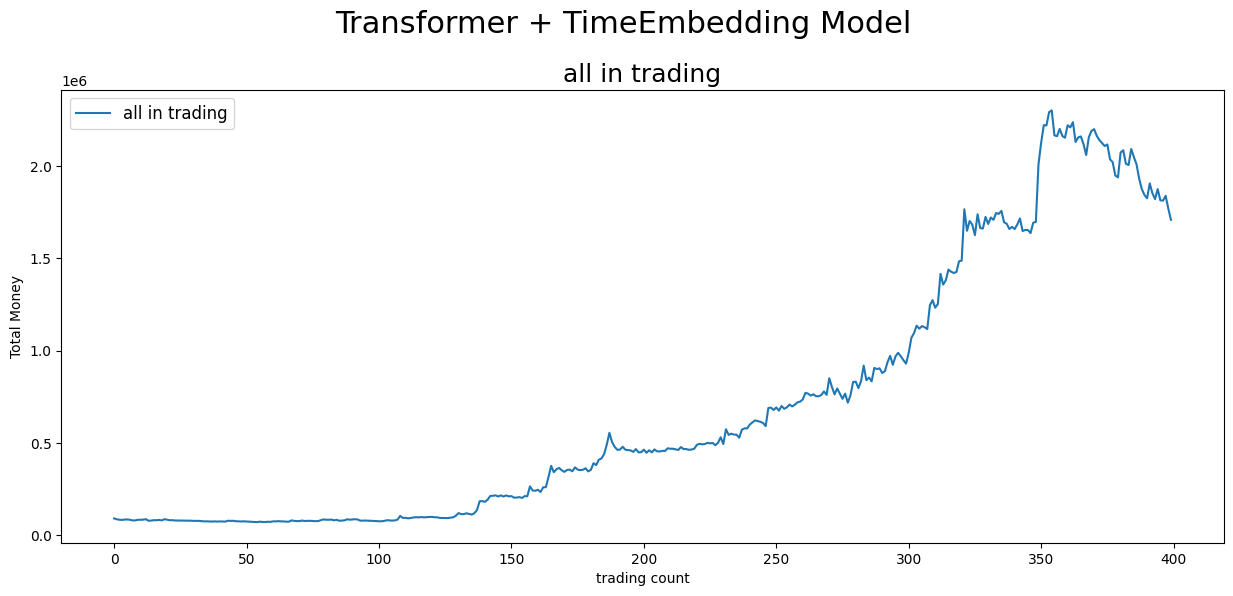

In [137]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)
#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(list(back_df['total_input_money'][2000:2400]), label='all in trading')
ax11.set_title("all in trading", fontsize=18)
ax11.set_xlabel('trading count')
ax11.set_ylabel('Total Money')
ax11.legend(loc="best", fontsize=12)

In [9]:
test_df[['Close','pred_Close','next_pred_Close']]

,Close,pred_Close,next_pred_Close
128,16645.2,16584.015714,NaN
129,16659.2,16595.301464,16584.015714
130,16689.7,16568.848853,16595.301464
131,16657.0,16633.149597,16568.848853
132,16657.7,16659.083569,16633.149597
...,...,...,...
3074,27952.2,27873.722283,27406.349972
3075,28026.1,27938.858895,27873.722283
3076,28167.7,28045.972119,27938.858895
3077,28019.1,28207.407079,28045.972119
